In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from variables import *
from matplotlib import rc
from Figures import ReportFigures
rf = ReportFigures()
rf.set_style(width='double', height='tall')
rc('text', usetex=True)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [11]:
if 'total_lake_transfer' in lake_stats:
    lake_stats.remove('total_lake_transfer')
lake_stats

['lake_inflow',
 'lake_outflow',
 'lake_interflow',
 'lake_lateral_inflow',
 'lake_outcfs',
 'lake_gwflow',
 'lake_2gw',
 'lake_seep_in',
 'lake_precip',
 'lake_evap',
 'elevlake',
 'lake_stream_in',
 'lake_sroff',
 'lake_vol',
 'lake_invol',
 'lake_outvol']

In [12]:
out_path_figs = 'cc-bc'
path = F'/mnt/d/5_Watershed/8_cc_outputs-bc/{ws}'
baseMods = os.listdir(path)
baseMods

['base']

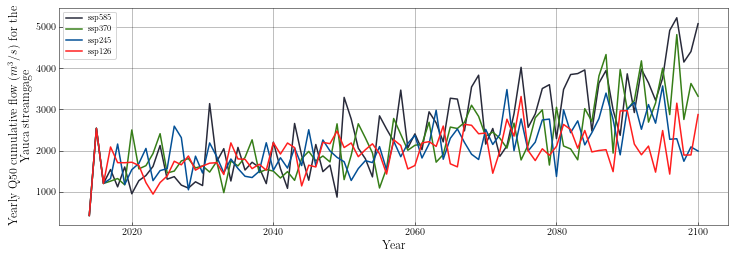

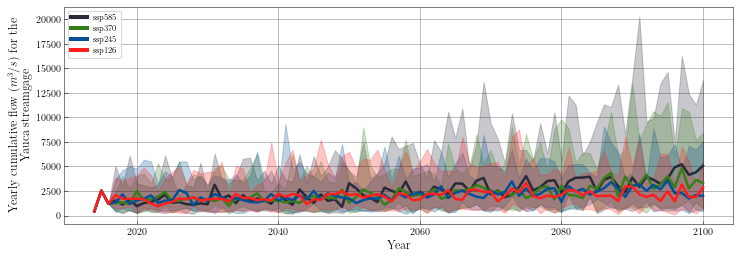

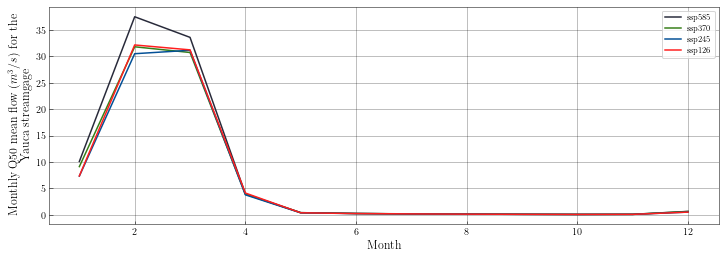

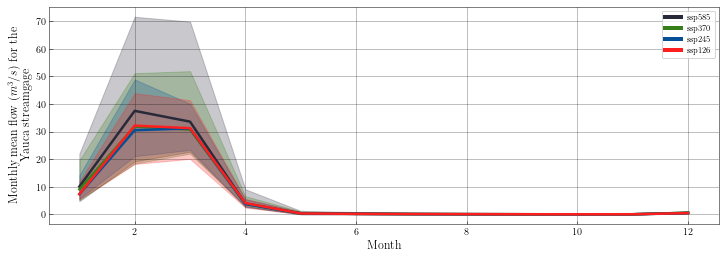

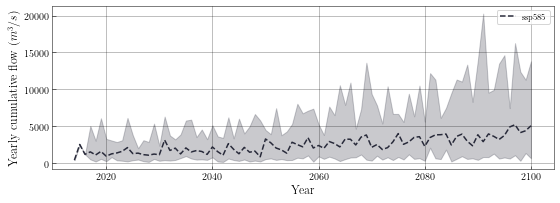

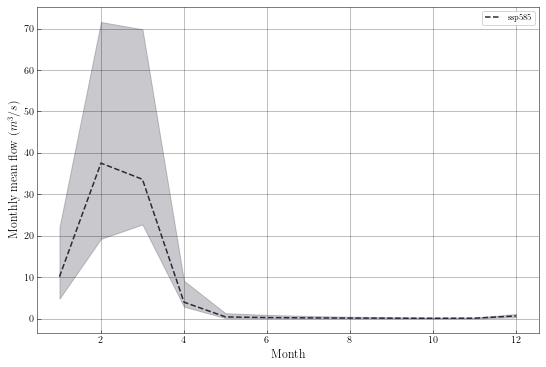

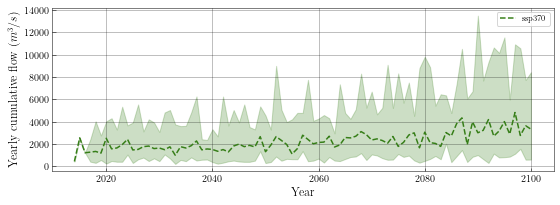

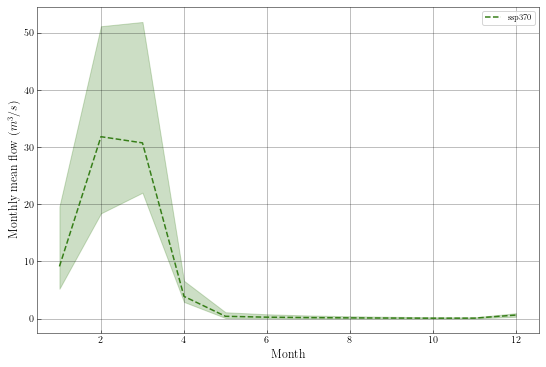

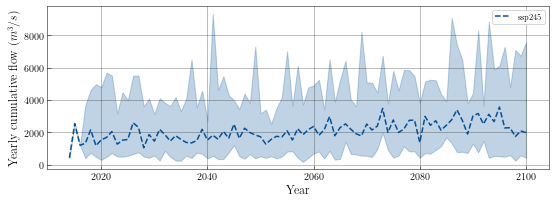

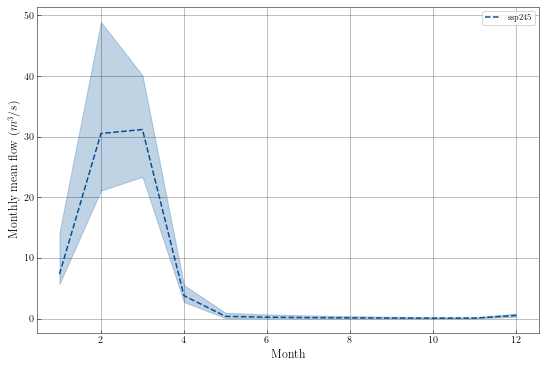

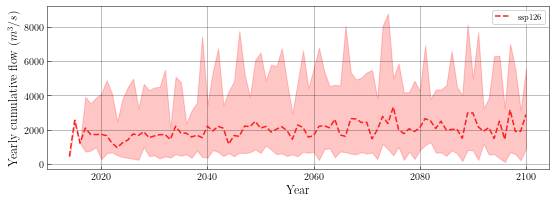

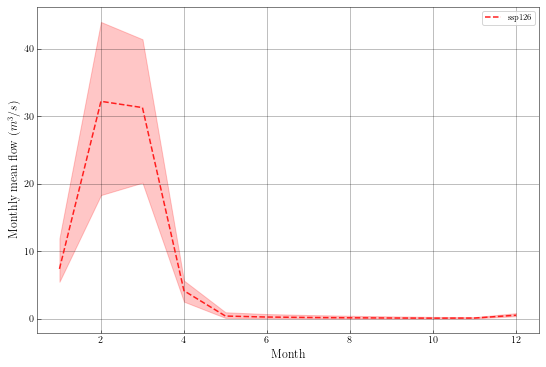

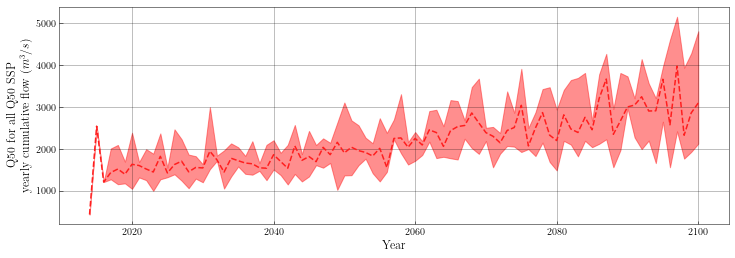

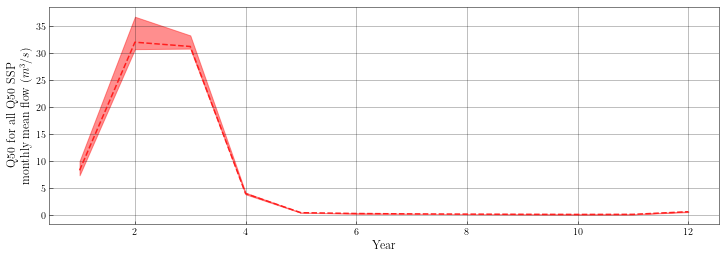

In [13]:
# Plot monthly mean || 
keyMo = {'base':{'label':'Yauca streamgage',
                          'type':'Stream',
                           'legend':'flow ($m^{3}/s$)',
                          'ord_strm':' 1',
                        'var':'streamflow1'}
        }

mult = 0.3048**3 # cfs to m3s #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!

for bMs in keyMo.keys():
    if 'evap' in bMs:
        bMsO = "_".join(bMs.split('_')[0:2])
    elif 'Streams' in bMs:
        bMsO = 'base'
    else:
        bMsO = bMs
            
    bmsPath = os.path.join(path,bMsO) # Each base model
    ssps = ['ssp126','ssp245','ssp370','ssp585']
    ssps = ssps[::-1]
    ssps_color = ['#FF1E1E','#035096','#367E18','#282A3A']
    ssps_color = ssps_color[::-1]
    grpYearDf = pd.DataFrame([])
    grpYearDf_005 = pd.DataFrame([]) # Q0.05 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
    grpYearDf_095 = pd.DataFrame([]) # Q0.95 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
    grpMonthDf = pd.DataFrame([])
    grpMonthDf_005 = pd.DataFrame([]) #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
    grpMonthDf_095 = pd.DataFrame([]) #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
    
    # Artificial legend for bands and lines
    custom_lines = [Line2D([0], [0], color=co, lw=4) for co in ssps_color]

    fig,ax=plt.subplots(figsize=(12,4))
    figb,axb=plt.subplots(figsize=(12,4))
    figma,axma=plt.subplots(figsize=(12,4))
    figmb,axmb=plt.subplots(figsize=(12,4))

    # Find the files
    for sspIdx in range(len(ssps)):
        sspX = [i for i in os.listdir(bmsPath) if ssps[sspIdx] in i]
        for modIdx in range(len(sspX)):
            mod = sspX[modIdx].split('_')[1]
            modPath = os.path.join(bmsPath,sspX[modIdx])
            if keyMo[bMs]['type'] == 'Stream':
                modDf = pd.read_csv(modPath,index_col=0,parse_dates=True)
                if modIdx == 0:
                    sspBDf = modDf[keyMo[bMs]['ord_strm']].to_frame()
                    sspBDf.columns = [mod]
                else:
                    sspBDf[mod] = modDf[keyMo[bMs]['ord_strm']]
            elif keyMo[bMs]['type'] == 'Reservoir':
                base = ['idx','year','month','day','hour','minute','second']
                modDf = pd.read_csv(modPath,skiprows=len(lake_stats)+1,delim_whitespace=True,header=None)
                modDf.columns = base + lake_stats
                modDf['date'] = pd.to_datetime(modDf[['year','month','day']])
                modDf = modDf.set_index('date')
                modDf = modDf.sort_index()
                if modIdx == 0:
                    sspBDf = modDf[keyMo[bMs]['var']].to_frame()
                    sspBDf.columns = [mod]
                else:
                    sspBDf[mod] = modDf[keyMo[bMs]['var']]

        # Multiplier
        sspBDf = sspBDf * mult #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
        
        # Generating datasets
        grpYear = sspBDf.groupby(sspBDf.index.year).agg("sum")
        grpYear_q05 = grpYear.quantile(0.05,axis=1)
        grpYear_q50 = grpYear.quantile(0.5,axis=1)
        grpYear_q95 =grpYear.quantile(0.95,axis=1)
        
        grpYearDf[ssps[sspIdx]] = grpYear_q50
        grpYearDf_005[ssps[sspIdx]] = grpYear_q05 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
        grpYearDf_095[ssps[sspIdx]] = grpYear_q95 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
        
        grpMon = sspBDf.groupby(sspBDf.index.month).agg("mean")
        grpMon_q05 = grpMon.quantile(0.05,axis=1)
        grpMon_q50 = grpMon.quantile(0.5,axis=1)
        grpMon_q95 =grpMon.quantile(0.95,axis=1)
        
        grpMonthDf[ssps[sspIdx]] = grpMon_q50
        grpMonthDf_005[ssps[sspIdx]] = grpMon_q05 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
        grpMonthDf_095[ssps[sspIdx]] = grpMon_q95 #!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!

        # Plotting

        grpYear_q50.plot(ax=ax,color=ssps_color[sspIdx])
        grpYear_q50.plot(ax=axb,color=ssps_color[sspIdx],linestyle='-',linewidth=2.5)
        axb.fill_between(grpYear_q05.index, grpYear_q05, grpYear_q95, color=ssps_color[sspIdx],alpha=0.25)
#      
        grpMon_q50.plot(ax=axma,color=ssps_color[sspIdx])
        grpMon_q50.plot(ax=axmb,color=ssps_color[sspIdx],linestyle='-',linewidth=2.5)
        axmb.fill_between(grpMon_q50.index, grpMon_q05, grpMon_q95, color=ssps_color[sspIdx],alpha=0.25)
                          
        fig2,ax2 = plt.subplots(figsize=(9,3))
        grpYear_q50.plot(ax=ax2,color=ssps_color[sspIdx],linestyle='--')
        ax2.fill_between(grpYear_q05.index, grpYear_q05, grpYear_q95, color=ssps_color[sspIdx],alpha=0.25)
        ax2.legend([ssps[sspIdx]])
        ax2.grid(color='black',alpha=0.5)
        ax2.set_xlabel('Year')
        ax2.set_ylabel(F"Yearly cumulative {keyMo[bMs]['legend']}")
        fig2.savefig(F"{out_path_figs}/{bMs}_year_{ssps[sspIdx]}_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)
        
        figmon,axmon = plt.subplots(figsize=(9,6))
        grpMon_q50.plot(ax=axmon,color=ssps_color[sspIdx],linestyle='--')
        axmon.fill_between(grpMon_q50.index, grpMon_q05, grpMon_q95, color=ssps_color[sspIdx],alpha=0.25)
        axmon.legend([ssps[sspIdx]])
        axmon.grid(color='black',alpha=0.5)
        axmon.set_xlabel('Month')
        axmon.set_ylabel(F"Monthly mean {keyMo[bMs]['legend']}")
        figmon.savefig(F"{out_path_figs}/{bMs}_month_{ssps[sspIdx]}_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)
        
    ax.set_xlabel('Year')
    ax.set_ylabel(F"Yearly Q50 cumulative {keyMo[bMs]['legend']} for the \n {keyMo[bMs]['label']}")
    ax.grid(color='black',alpha=0.5)
    ax.legend(ssps)
    fig.savefig(F"{out_path_figs}/{bMs}_year_q50s_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)
    
    axb.set_xlabel('Year')
    axb.set_ylabel(F"Yearly cumulative {keyMo[bMs]['legend']} for the \n {keyMo[bMs]['label']}")
    axb.grid(color='black',alpha=0.5)
    axb.legend(custom_lines,ssps,loc='upper left')
    figb.savefig(F"{out_path_figs}/{bMs}_year_q50s_w_bounds_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)

    axma.set_xlabel('Month')
    axma.set_ylabel(F"Monthly Q50 mean {keyMo[bMs]['legend']} for the \n {keyMo[bMs]['label']}")
    axma.grid(color='black',alpha=0.5)
    axma.legend(ssps)
    figma.savefig(F"{out_path_figs}/{bMs}_month_q50s_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)

    axmb.set_xlabel('Month')
    axmb.set_ylabel(F"Monthly mean {keyMo[bMs]['legend']} for the \n {keyMo[bMs]['label']}")
    axmb.grid(color='black',alpha=0.5)
    axmb.legend(custom_lines,ssps,loc='upper right')
    figmb.savefig(F"{out_path_figs}/{bMs}_month_q50s_w_bounds_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)
    
    grDf_05 = grpYearDf.quantile(0.05,axis=1)
    grDf_50 = grpYearDf.quantile(0.5,axis=1)
    grDf_95 = grpYearDf.quantile(0.95,axis=1)
    
    fig0,ax0=plt.subplots(figsize=(12,4))
    grDf_50.plot(ax=ax0,color=ssps_color[-1],linestyle='--')
    ax0.fill_between(grpYearDf.index, grDf_05, grDf_95, color=ssps_color[-1],alpha=0.5)
    ax0.grid(color='black',alpha=0.5)
    ax0.set_xlabel('Year')
    ax0.set_ylabel(F"Q50 for all Q50 SSP \n yearly cumulative {keyMo[bMs]['legend']}")
    fig0.savefig(F"{out_path_figs}/{bMs}_year_extra_q50sq50s_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300)

    grDfM_05 = grpMonthDf.quantile(0.05,axis=1)
    grDfM_50 = grpMonthDf.quantile(0.5,axis=1)
    grDfM_95 = grpMonthDf.quantile(0.95,axis=1)
    
    fig4,ax4=plt.subplots(figsize=(12,4))
    grDfM_50.plot(ax=ax4,color=ssps_color[-1],linestyle='--')
    ax4.fill_between(grpMonthDf.index, grDfM_05, grDfM_95, color=ssps_color[-1],alpha=0.5)
    ax4.grid(color='black',alpha=0.5)
    ax4.set_xlabel('Year')
    ax4.set_ylabel(F"Q50 for all Q50 SSP \n monthly mean {keyMo[bMs]['legend']}")
    fig4.savefig(F"{out_path_figs}/{bMs}_month_extra_q50sq50s_{keyMo[bMs]['var']}.png",transparent=True,bbox_inches='tight', dpi=300) #!#!#!#!#!#!#!
        
    grpMonthDf.to_csv(F"{out_path_figs}/{bMs}_month_q50.csv") #!#!#!#!#!#!#!
    grpMonthDf_005.to_csv(F"{out_path_figs}/{bMs}_month_q05.csv") #!#!#!#!#!#!#!
    grpMonthDf_095.to_csv(F"{out_path_figs}/{bMs}_month_q95.csv") #!#!#!#!#!#!#!
    grpYearDf.to_csv(F"{out_path_figs}/{bMs}_year_q50.csv") #!#!#!#!#!#!#!
    grpYearDf_005.to_csv(F"{out_path_figs}/{bMs}_year_q05.csv") #!#!#!#!#!#!#!
    grpYearDf_095.to_csv(F"{out_path_figs}/{bMs}_year_q95.csv") #!#!#!#!#!#!#!

In [14]:
# Should I add ET?